# Medical Treatment Cost Forecasting

**Link**

https://www.kaggle.com/mirichoi0218/insurance


**Context**

This dataset contains the cost of medical treatment of different patients.


**Content**

The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and predict the cost of medical treatment by using regression analysis.

The dataset consists of the following attributes:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height
- children: number of children covered by health insurance / Number of dependents
- smoker: smoking (0: no, 1: yes)
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: individual medical costs billed by health insurance

The `charges` attribute is our target variable, which should be predicted depending on new patient informations.

**Task (Regression)**

Your task is to use the present data set to predict the cost of medical treatment for new patients. To do this, use the `Linear Regression` and `SVR` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

# Code und Dokumentation

## 1. Frame the problem

### 1.1 Ziel

Das primäre Ziel besteht darin, die Kosten der medizinischen Behandlung für neue Patienten basierend auf verschiedenen Faktoren wie Alter, Geschlecht, BMI, Anzahl der Kinder, Rauchstatus und Wohnregion vorherzusagen. Genaue Vorhersagen können Versicherungsunternehmen helfen, Prämien festzulegen, finanzielle Risiken zu managen und personalisierte Gesundheitspläne zu erstellen.
   
### 1.2 Verwendung der Lösung

Die Lösung wird in den Arbeitsablauf des Versicherungsunternehmens integriert, um die Kosten der medizinischen Behandlung für neue Versicherungsnehmer abzuschätzen oder die Prämien für bestehende Versicherungsnehmer anzupassen. Dieses prädiktive Modell ermöglicht es dem Unternehmen, Risiken genauer zu bewerten und wettbewerbsfähige Preise anzubieten, während die Rentabilität sichergestellt wird

### 1.3 Aktuelle Lösungen

Versicherungsunternehmen verwenden in der Regel versicherungsmathematische Methoden (Traditionelle statistische Methoden) und manuelle Schätzungen (Komplexe Regeln) zur Kostenschätzung auf der Grundlage historischer Daten und demografischer Profile. Diese Methoden können zeitaufwändig, kostenintensiv, weniger genau sein und möglicherweise keine komplexen Muster in den Daten erfassen. Ein auf maschinellem Lernen basierter Ansatz kann präzisere und skalierbarere Lösungen bieten. [1]

[1] U. Orji und E. Ukwandu, "Machine Learning For An Explainable Cost Prediction of Medical Insurance," arXiv, Nov. 2023. [Online]. Verfügbar: https://ar5iv.org/abs/2311.14139. [Zugegriffen: 20. Juni 2024].


### 1.4 Problemdefinition

Typ: Überwachtes Lernen
Herangehensweise: Regression
Modus: Offline
Begründung:
Wir haben historische Daten mit bekannten Kosten (Gebühren) und damit verbundenen Merkmalen. Das Ziel ist die Vorhersage einer kontinuierlichen Variable, was es zu einem Regressionsproblem macht. Ein Offline-Ansatz ist angemessen, da wir das Modell auf historischen Daten trainieren und es dann für zukünftige Vorhersagen einsetzen werden.

### 1.5 Leistungsmessung

Die Leistung wird anhand des Root Mean Squared Error (RMSE) und des Bestimmtheitsmaß (R2) gemessen. RMSE wird wegen seiner Empfindlichkeit gegenüber Ausreißern bevorzugt, was bei medizinischen Kosten signifikant sein kann.

### 1.6 Ausrichtung an den Unternehmenszielen

Die gewählten Leistungsmaße (RMSE und MAE) stimmen mit dem Geschäftsziel überein, Vorhersagefehler zu minimieren, um Behandlungskosten besser abzuschätzen und so finanzielle Risiken zu reduzieren.

### 1.7 Erforderliche Mindestleistung

Die Mindestleistung des neuen Modells sollte die Leistung bestehender Methoden übertreffen. Angenommen, die aktuellen manuellen Methoden haben folgende Fehlermaße:

RMSE: 4000
MAE: 3000

Ein realistischer Schwellenwert für das maschinelle Lernmodell könnte sein, diese Werte um mindestens 10% zu verbessern. Das bedeutet:

RMSE: 3600
MAE: 2700

Diese Verbesserungen würden signifikant genug sein, um die Überlegenheit des neuen Modells gegenüber den bestehenden Methoden zu demonstrieren.

### 1.8 Vergleichbare Probleme
- Hauspreisvorhersage
- Vorhersage von Kfz-Versicherungsansprüchen
- Vorhersage von Darlehenausfällen

### 1.9 Wiederverwendung von Tools

Wir können auf etablierte maschinelle Lernframeworks und -bibliotheken (wie Scikit-learn, TensorFlow oder XGBoost) und Methoden aus ähnlichen Regressionsaufgaben zurückgreifen. Werkzeuge wie Jupyter Notebooks, pandas und matplotlib werden für die Datenexploration und -visualisierung wesentlich sein.

### 1.10 Verfügbarkeit von menschlicher Expertise

Domänenexperten für Gesundheitskosten und Versicherungen sowie Datenwissenschaftler mit Erfahrung in der Regressionsanalyse werden entscheidend sein, um die Daten zu verstehen und die Modelle zu verfeinern

### 1.11 Manuelle Lösung

Manuell würde man historische Kosten analysieren, für Inflation anpassen, Patientendemografie und Gesundheitsindikatoren berücksichtigen und Expertenurteile verwenden, um zukünftige Kosten abzuschätzen. Dieser Prozess ist von Natur aus subjektiv und weniger skalierbar.

### 1.12 Annahmen
- Der Datensatz ist repräsentativ für die Bevölkerung.
- Die einbezogenen Faktoren (Alter, Geschlecht, BMI, Kinder, Raucher, Region) sind ausreichend, um die Kosten vorherzusagen.
- Es gibt keine signifikanten externen Faktoren (z. B. politische Veränderungen, große medizinische Fortschritte), die die Kosten drastisch verändern.

### 1.13 Überprüfen der Annahmen
- Statistische Tests und Visualisierungen (z. B. Korrelationsmatrizen, Streudiagramme) können die Relevanz der Merkmale überprüfen.
- Datenbereinigungsprozesse können Datenqualitätsprobleme angehen.
- Bewertung der anfängliche Modellleistung an einem Validierungssatz.


### 1.14 Modellauswahl und Implementierung
- Lineare Regression
- Support-Vektor-Regression (SVR)
- Random Forest

## 2. Get the Data

### 2.1 Einlesen der Daten 
Die Datei `insurance.csv` wird mit Panda eingelesen. Diese Datei enthält die Informationen über Patienten und die individuellen medizinischen Kosten, die vorhergesagt werden sollen. Eine Kopie namens `insurance_data` wird im Vorfeld erstellt.

In [8]:
import pandas as pd

data = pd.read_csv('insurance.csv')
insurance_data = data.copy()

Um einen kurzen Überblick über die eingelesen Daten zu bekommen, wird der `head()` der `insurance_data` angezeigt.

In [47]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2.2 Konvertierung der Daten

Mit `info()` wird herausgefunden welchen Dateityp die einzelnen Attribute besitzen.

In [9]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Die kategorischen Attribute `sex`, `smoker` und `region` sind als `Dtype: object` definiert. Um sicherzustellen, dass die Daten korrekt typisiert sind, werden die genannten Attribute als `category` definiert. 

In [48]:
insurance_data['sex'] = insurance_data['sex'].astype('category')
insurance_data['smoker'] = insurance_data['smoker'].astype('category')
insurance_data['region'] = insurance_data['region'].astype('category')

Nach der Konvertierung der Attribute können sie für folgende Anwendungen korrekt genutzt werden. Die `insurance_date` wird wiederholt auf die Datentypen überprüft mit `info()`.

### 2.3 Überprüfung der Daten

In [11]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


Es sind keine Attribute als `object` definiert. Zur finalen Überprüfung der Daten wird nochmal der `head()` ausgegeben. 

In [12]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Mit den nun konvertierten und angepassten Daten kann ein `train_set` und `test_set` erstellt werden.

### Aufteilung der Daten

`insurance_data` wird in ein `train_set` und ein `test_set` aufgeteilt mithilfe der Funktion `train_test_split()`. Die `test_size` beträgt 20 % der Gesamtdaten. Das `test_set` wird zur Seite gelegt und zum Ende des Projektes 

**2.7 Testdatenmenge erstellen und zur Seite legen: Der Trainings- und Testdatensatz werden erstellt. Der Testdatensatz wird beiseitegelegt und nicht während des Modelltrainings verwendet, um eine unvoreingenommene Bewertung des Modells zu gewährleisten.**

In [14]:
from sklearn.model_selection import train_test_split

# Aufteilung in Trainings- und Testdatensatz
train_set, test_set = train_test_split(insurance_data, test_size=0.2, random_state=42)


**2.8 Daten visualisieren**

In [15]:
# Erstellen einer kombinierten Ansicht der Trainingsdaten zur Visualisierung, um die Erstellung von Diagrammen und die Durchführung von Analysen zu vereinfachen.
x_train_plot = x_train.copy()
y_train_plot = y_train.copy()

combined_training_plot = pd.concat([x_train_plot, y_train_plot], axis=1)

NameError: name 'x_train' is not defined

In [16]:
# Erster Blick auf die kombinierten Trainingsdaten
print(combined_training_plot.head())

NameError: name 'combined_training_plot' is not defined

In [17]:
#Umwandeln von Inf-Werten in NaN
combined_training_plot.replace([np.inf, -np.inf], np.nan, inplace=True)

NameError: name 'combined_training_plot' is not defined

Brauchen wir das also inf in nan ändern?

# Explore the Data

**3.1 Es wird, wie in der Aufgabenstellung verlangt, jedes Attribut (jede Spalte) im kombinierten Trainingsdatensatz untersucht und es werden verschiedene statistische Informationen über die Attribute ausgegeben.**

In [18]:
for column in combined_training_plot.columns:
    print(f'Attribut: {column}')
    print(f'Typ: {combined_training_plot[column].dtype}')
    print(f'Fehlende Werte (%): {combined_training_plot[column].isnull().mean() * 100:.2f}%')
    print(f'Einzigartige Werte: {combined_training_plot[column].nunique()}')
    # Überprüfung der Standardabweichung nur für numerische Spalten
    if pd.api.types.is_numeric_dtype(combined_training_plot[column]):
        print(f'Standardabweichung (Rauschen): {combined_training_plot[column].std()}')
    print(combined_training_plot[column].describe())
    print('-' * 100)


NameError: name 'combined_training_plot' is not defined

Die Anzahl der fehlenden Werte für jedes Attribut wird überprüft.

In [19]:
print(combined_training_plot.isnull().sum())

NameError: name 'combined_training_plot' is not defined

**3.2 Zielattribut identifizieren**

In [20]:
target_attribute = 'charges'
print(f'Das Zielattribut für überwachtes Lernen ist: {target_attribute}')

Das Zielattribut für überwachtes Lernen ist: charges


**3.3 Daten visualisieren**

In [21]:
# Histogramm der Behandlungskosten
plt.figure()
sns.histplot(combined_training_plot['charges'], bins=30, kde=True)
plt.title('Verteilung der Behandlungskosten')
plt.xlabel('Behandlungskosten')
plt.ylabel('Häufigkeit')
plt.show()

NameError: name 'combined_training_plot' is not defined

<Figure size 640x480 with 0 Axes>

In [22]:
#Boxplot von Behandlungskosten nach Rauchstatus
plt.figure()
sns.boxplot(x='smoker', y='charges', data=combined_training_plot)
plt.title('Behandlungskosten nach Rauchstatus')
plt.xlabel('Rauchstatus')
plt.ylabel('Behandlungskosten')
plt.show()

NameError: name 'combined_training_plot' is not defined

<Figure size 640x480 with 0 Axes>

In [23]:
# Paarweise Streudiagramme (Pairplot) für ausgewählte Attribute
selected_features = ['age', 'bmi', 'children', 'charges']
sns.pairplot(combined_training_plot[selected_features])
plt.show()

NameError: name 'combined_training_plot' is not defined

In [24]:
#Die Variablen, die verschiedene Werte enthalten, zB männlich und weiblich bei Geschlecht, werden jetzt unterteilt in die Anzahl ihrer Werte, sodass die Angaben nur noch True oder False enthalten.
# Kategoriale Variablen in numerische Werte umwandeln für Korrelationen
combined_training_plot_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])

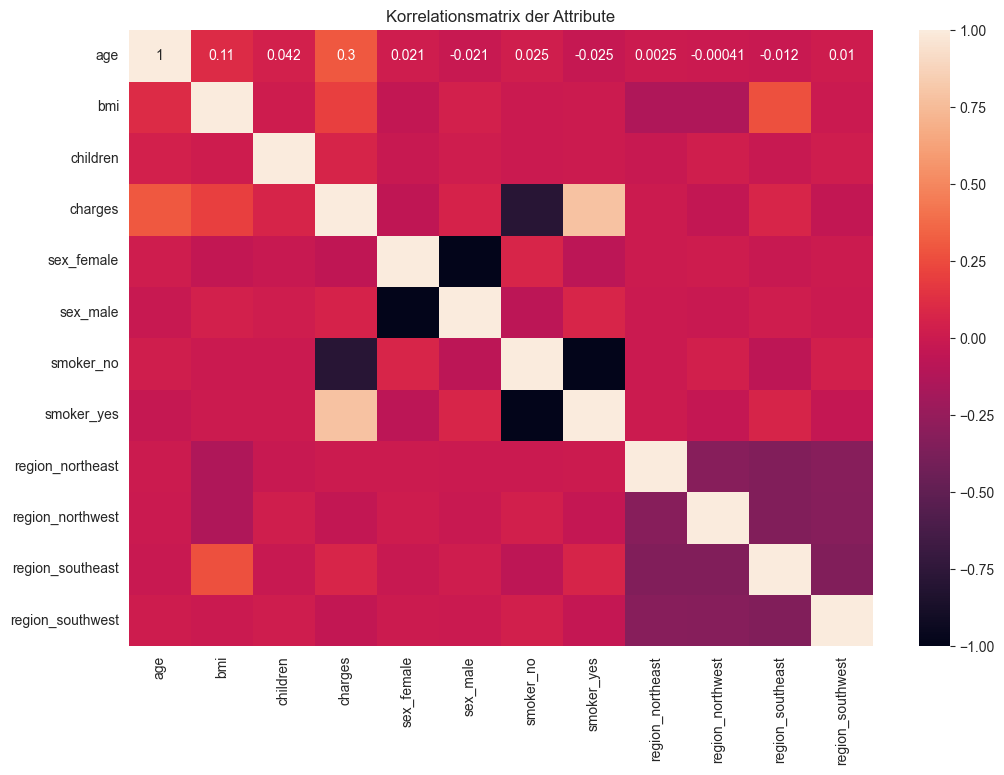

In [25]:
# Korrelationsmatrix berechnen mit den kodierten Daten
correlation_matrix = combined_training_plot_encoded.corr()

# Heatmap der Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Korrelationsmatrix der Attribute')
plt.show()


**3.4 Dokumentation der Transformationen**

1. **Log-Transformation der Behandlungskosten:**
   - Die Spalte `charges` soll logarithmisch transformiert werden, um die rechtsschiefe Verteilung zu normalisieren.

2. **Standardisierung der numerischen Variablen:**
   - Alle numerischen Features wurden standardisiert, um einen Mittelwert von 0 und eine Standardabweichung von 1 zu haben.

3. **One-Hot-Encoding der kategorialen Variablen:**
   - Die kategorialen Variablen `sex`, `region` und `smoker` sollen mittels One-Hot-Encoding in numerische Formate umgewandelt werden.

4. **Umgang mit Ausreißern:**
   - Datenpunkte, die mehr als 3 Standardabweichungen vom Mittelwert sollen entfernt werden,.



**3.5 Ergebnisse**



**Übersicht der Daten**
- Der Datensatz enthält 1338 Einträge mit 7 Merkmalen und der Zielvariable "charges".
- Die Merkmale umfassen demografische Informationen wie Alter, Geschlecht, BMI, Anzahl der Kinder, Rauchstatus und Wohnregion.

**Verteilungen der Merkmale**
- Die Verteilung der Behandlungskosten ist rechtsschief, was auf einige hohe Kostenfälle hinweist.
- Das Boxplot der Behandlungskosten nach Rauchstatus zeigt, dass Raucher tendenziell höhere Behandlungskosten haben als Nichtraucher.

**Korrelationen**
- Es gibt eine starke positive Korrelation zwischen "charges" und "smoker" (Rauchstatus), was darauf hindeutet, dass Raucher höhere Behandlungskosten haben.
- Auch das Alter und der BMI zeigen eine positive Korrelation mit den Behandlungskosten.


**Fazit**
- Die explorative Analyse hat wertvolle Einblicke in die Struktur und Beziehungen der Daten geliefert. Diese Erkenntnisse werden bei der Auswahl und Vorbereitung der Modelle berücksichtigt.


# Prepare the Data

In [26]:
import pandas as pd
import numpy as np

def remove_outliers(data, columns, threshold):

    filtered_data = data.copy()
    outliers_dataframes = []
    outliers_values = []

    # Iterate over specified columns
    for col in columns:
        # Calculate Z-scores for the column
        z_scores = np.abs((filtered_data[col] - filtered_data[col].mean()) / filtered_data[col].std())

        # Identify outliers based on the threshold
        outliers = z_scores > threshold

        # Append outliers to outliers_dataframes list
        outliers_dataframes.append(filtered_data[outliers])

        # Append outlier values to outliers_values list
        outliers_values.extend([col] * np.sum(outliers))

        # Remove outliers from the dataframe
        filtered_data = filtered_data[~outliers]

        removed_outliers = pd.concat(outliers_dataframes)
        removed_outliers['outlier_values'] = outliers_values

    return filtered_data, removed_outliers




In [27]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1070 non-null   int64   
 1   sex       1070 non-null   category
 2   bmi       1070 non-null   float64 
 3   children  1070 non-null   int64   
 4   smoker    1070 non-null   category
 5   region    1070 non-null   category
 6   charges   1070 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 45.4 KB


In [28]:
train_set, outliers_df = remove_outliers(train_set, columns=['age', 'bmi', 'charges'], threshold=3)

In [29]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1060 non-null   int64   
 1   sex       1060 non-null   category
 2   bmi       1060 non-null   float64 
 3   children  1060 non-null   int64   
 4   smoker    1060 non-null   category
 5   region    1060 non-null   category
 6   charges   1060 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 45.0 KB


In [30]:
outliers_df.head(30)

,age,sex,bmi,children,smoker,region,charges,outlier_values
847,23,male,50.380,1,no,southeast,2438.05520,bmi
1317,18,male,53.130,0,no,southeast,1163.46270,bmi
116,58,male,49.060,0,no,southeast,11381.32540,bmi
1146,60,male,32.800,0,yes,southwest,52590.82939,charges
1230,52,male,34.485,3,yes,northwest,60021.39897,charges
1241,64,male,36.960,2,yes,southeast,49577.66240,charges
819,33,female,35.530,0,yes,northwest,55135.40209,charges
1300,45,male,30.360,0,yes,southeast,62592.87309,charges
577,31,female,38.095,1,yes,northeast,58571.07448,charges
34,28,male,36.400,1,yes,southwest,51194.55914,charges


In [31]:
# Merkmale (Features) und Zielvariable (Target) werden definiert
x_train = train_set.drop(columns=['charges'], axis=1)
y_train = train_set['charges']

**4.1 Clean the Data**

Das Auffüllen von fehlenden Daten ist nicht notwendig, da es keine fehlenden Werte im Datensatz gibt (siehe 3.1). Allerdings können im Testdatensatz Daten fehlen. 

Die Features werden aufgeteilt in numerische und kategorische Features anhand von 2.3, um einen passenden Transformer anzuwenden.

In [32]:
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

Für die numerische Werte 

In [33]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

Für kategorische

In [34]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}



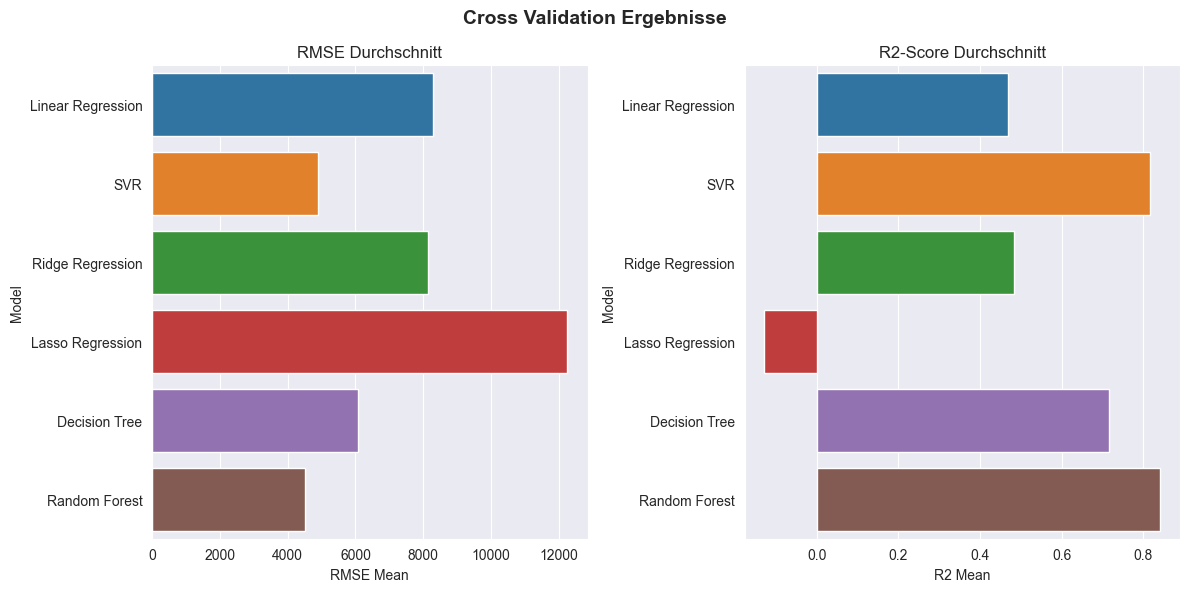

In [46]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# 4. Kreuzvalidierung und Training der Modelle
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation: Modelltraining und Evaluation
def evaluate_model_with_cv(model, x, y, cv):
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    r2_scorer = make_scorer(r2_score)
    mse_scores = cross_val_score(model, x, y, scoring=mse_scorer, cv=cv)
    r2_scores = cross_val_score(model, x, y, scoring='r2', cv=cv)
    rmse_scores = np.sqrt(-mse_scores)
    return rmse_scores, r2_scores

def create_full_pipeline(model):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=model,
            func=np.log,
            inverse_func=np.exp
        ))
    ])



# Cross-Validation Ergebnisse
cv_results = {'Model': [], 'RMSE Mean': [], 'RMSE Std': [], 'R2 Mean': [], 'R2 Std': []}

for name, model in models.items():
    pipeline = create_full_pipeline(model)
    rmse_scores, r2_scores = evaluate_model_with_cv(pipeline, x_train, y_train, kf)
    cv_results['Model'].append(name)
    cv_results['RMSE Mean'].append(rmse_scores.mean())
    cv_results['RMSE Std'].append(rmse_scores.std())
    cv_results['R2 Mean'].append(r2_scores.mean())
    cv_results['R2 Std'].append(r2_scores.std())

final_results = {'Model': [], 'RMSE': [], 'R2 Score': [], 'y_pred': []}

'''for name, model in models.items():
    pipeline = create_full_pipeline(model)
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    final_results['Model'].append(name)
    final_results['RMSE'].append(rmse)
    final_results['R2 Score'].append(r2)
    final_results['y_pred'].append(y_pred)'''
    
# Ergebnisse der Cross-Validation
cv_results_df = pd.DataFrame(cv_results)

# Ergebnisse der finalen Bewertung
final_results_df = pd.DataFrame(final_results)

# Visualisierung der Ergebnisse
plt.figure(figsize=(12, 6))
plt.suptitle('Cross Validation Ergebnisse', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 1)
sns.barplot(x='RMSE Mean', y='Model', data=cv_results_df)
plt.title('RMSE Durchschnitt')

plt.subplot(1, 2, 2)
sns.barplot(x='R2 Mean', y='Model', data=cv_results_df)
plt.title('R2-Score Durchschnitt')

plt.tight_layout()
plt.show()


In [ ]:
selected_models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
}

In [ ]:
def get_model_params(models):
    params_list = []

    for name, model in models.items():
        params_dict = {'Model': name}
        params = model.get_params()
        for param_name, param_value in params.items():
            params_dict[param_name] = param_value
        params_list.append(params_dict)

    params_df = pd.DataFrame(params_list)
    return params_df

get_model_params(selected_models)

In [ ]:
# Modellnamen zur Identifikation in der Ergebnismatrix
model_names = ["Linear Regression", "SVR", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest"]

# Ermittlung der Indizes der Modelle, basierend auf ihrer Position in results_df und model_names
# Wichtig: Stellen Sie sicher, dass die Reihenfolge in results_df mit model_names übereinstimmt.
# Dieser Schritt ist abhängig von der genauen Struktur Ihrer results_df.

# Erstellen der 3x2 Subplot-Matrix
fig, axes = plt.subplots(2,3, figsize=(15, 10))
axes = axes.flatten() # Umwandlung der Achsen-Struktur in eine einfache Liste für leichteres Iterieren

for i, model_name in enumerate(model_names):
    ax = axes[i]

    y_pred = final_results_df.iloc[i]['y_pred']
    
    # Scatter-Plot der vorhergesagten Werte
    ax.scatter(y_test, y_pred, color='orange', alpha=0.5, label='Vorhergesagte Werte')
    
    # Ideal-Linie
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
    
    # Beschriftungen und Titel
    ax.set_xlabel('Wahre Werte')
    ax.set_ylabel('Vorhergesagte Werte')
    ax.set_title(f'{model_name}')
    ax.legend()

# Anpassung des Layouts für bessere Lesbarkeit
plt.tight_layout()
plt.show()

### 6. Fine-Tune der Modelle

Im Folgenden wird probiert die Vorhersagefähigkeit der Modelle noch weiter zu steigern

In [ ]:
models_to_search = [
    ('Linear Regression', LinearRegression(), {
        'model__fit_intercept': [True, False]
    }),
    ('SVR', SVR(), {
        'model__kernel': ['linear', 'poly', 'rbf'],
        'model__C': [0.1, 1, 10],
        'model__epsilon': [0.01, 0.1, 0.5]
    }),
    ('Random Forest Regression', RandomForestRegressor(), {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    })
]

In [ ]:
def perform_grid_search(X, y, models, preprocessor, cv):
    best_models = {}

    for name, model, param_grid in models:
        
        model_pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])

        grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=cv, scoring='r2', verbose=1, n_jobs=-1)
        grid_search.fit(X, y)

        best_models[name] = {
            'model': grid_search.best_estimator_,
            'params': grid_search.best_params_,
            'score': grid_search.best_score_
        }

        print(f"Best parameters for {name}:")
        print(grid_search.best_params_)
        print(f"Best {name} model score: {grid_search.best_score_}")
        print()

    return best_models

best_models = perform_grid_search(x_train, y_train, models_to_search, preprocessor, kf)


#### Decision Tree mithilfe von Random Search

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Definition der Parameterbereiche, angepasst für DecisionTreeRegressor
param_distribs_dectree = {
    'max_depth': [3, 5, 10, None],  # Einschließlich der Möglichkeit von unbegrenzten Tiefen
    'min_samples_split': randint(low=2, high=20),  # Zufällige Auswahl von 2 bis 20
    'min_samples_leaf': randint(low=1, high=20),  # Zufällige Auswahl von 1 bis 20
    'max_features': randint(low=1, high=transformed_x_train.shape[1] + 1)  # Basierend auf der Anzahl der Features
}

# Erstellung des DecisionTreeRegressor-Modells
decisiontree_reg = DecisionTreeRegressor(random_state=42)

# Initialisierung von RandomizedSearchCV mit den spezifischen Einstellungen für den DecisionTree
rnd_search_dectree = RandomizedSearchCV(decisiontree_reg, param_distributions=param_distribs_dectree,
                                        n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Durchführung der Suche auf den Trainingsdaten
rnd_search_dectree.fit(transformed_x_train, y_train)

# Ausgabe der besten Parameter und des besten Modells
print("Beste Parameter: ", rnd_search_dectree.best_params_)
print("Bester Entscheidungsbaum: ", rnd_search_dectree.best_estimator_)

In [ ]:
feature_importances_rnds_dectree = rnd_search_dectree.best_estimator_.feature_importances_

In [ ]:

cat_encoder = transformer.named_transformers_['cat'].named_steps['encoder']

cat_one_hot_attribs = cat_encoder.get_feature_names_out(cat_features)

# Kombinieren der numerischen und kategorialen Feature-Namen 
attributes = num_features + list(cat_one_hot_attribs)

# Zusammenstellen der Feature-Wichtigkeiten und der Feature-Namen
importance_scores = sorted(zip(feature_importances_rnds_dectree, attributes), reverse=True)

for score, attrib in importance_scores:
    print(attrib, score)

In [ ]:
final_model_rnds_dectree = rnd_search_dectree.best_estimator_


final_predictions_rnds_dectree = final_model_rnds_dectree.predict(transformed_x_test)

final_mse = mean_squared_error(y_test, final_predictions_rnds_dectree)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(final_mse)
r2final = r2_score(y_test, final_predictions_rnds_dectree)
print(r2final)

#### Decision Tree mithilfe von Grid Search

In [ ]:
param_grid_dectree = [
    {'ccp_alpha': [0.0001, 0.001, 0.01, 0.1], 'max_features': [2, 4, 6, 8]}
]

decisiontree_reg = DecisionTreeRegressor(random_state=42)
# train across 5 folds
grid_search_dectree = GridSearchCV(decisiontree_reg, param_grid_dectree, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_dectree.fit(transformed_x_train, y_train)

# Ausgabe der besten Parameter und des besten Schätzers
print("Beste Parameter: ", grid_search_dectree.best_params_)
print("Bester Entscheidungsbaumregressor: ", grid_search_dectree.best_estimator_)

In [ ]:
feature_importances_grids_dectree = grid_search_dectree.best_estimator_.feature_importances_

In [ ]:

# Zusammenstellen der Feature-Wichtigkeiten und der Feature-Namen
importance_scores_dectree_grids = sorted(zip(feature_importances_grids_dectree, attributes), reverse=True)

for score, attrib in importance_scores_dectree_grids:
    print(attrib, score)

In [ ]:
final_model_grids_dectree = grid_search_dectree.best_estimator_


final_predictions_grids_dectree = final_model_grids_dectree.predict(transformed_x_test)

final_mse = mean_squared_error(y_test, final_predictions_grids_dectree)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(final_mse)
r2final = r2_score(y_test, final_predictions_grids_dectree)
print(r2final)

## Jetzt mit Random Forest und Random Search

In [ ]:
param_distribs_rf_rs = {
        'n_estimators': randint(low=1, high=150),
        'max_features': randint(low=1, high=8),
    }

randomforest_reg = RandomForestRegressor(random_state=42)
rnd_search_rnd_forest = RandomizedSearchCV(randomforest_reg, param_distributions=param_distribs_rf_rs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_rnd_forest.fit(transformed_x_train, y_train)

In [ ]:
rnd_search_rnd_forest.best_params_

In [ ]:
rnd_search_rnd_forest.best_estimator_

In [ ]:
feature_importances_rndsearch_rndforest = rnd_search_rnd_forest.best_estimator_.feature_importances_
feature_importances_rndsearch_rndforest

In [ ]:
# Zusammenstellen der Feature-Wichtigkeiten und der Feature-Namen
importance_scores_rndsearch_randomforest = sorted(zip(feature_importances_rndsearch_rndforest, attributes), reverse=True)

for score, attrib in importance_scores_rndsearch_randomforest:
    print(attrib, score)

In [ ]:
final_model_rndsearch_rndforest = rnd_search_rnd_forest.best_estimator_


final_predictions_rndsearch_rndforest = final_model_rndsearch_rndforest.predict(transformed_x_test)

final_mse = mean_squared_error(y_test, final_predictions_rndsearch_rndforest)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(final_mse)
r2final = r2_score(y_test, final_predictions_rndsearch_rndforest)
print(r2final)

# Random Forest und Grid Search